In [1]:
import yfinance as yf 
import numpy as np 
import matplotlib.pyplot as plt 
from arch import arch_model

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (12,7)

In [2]:
data = yf.download('GOOG', period='5y', interval='1d', auto_adjust=True, progress=False)
data['returns'] = np.log(data.Close / data.Close.shift(1)).mul(100)
data.dropna(inplace=True)
data 

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2017-02-27,824.549988,830.500000,824.000000,829.280029,1101500,0.077207
2017-02-28,825.609985,828.539978,820.200012,823.210022,2260800,-0.734653
2017-03-01,828.849976,836.255005,827.260010,835.239990,1496500,1.450774
2017-03-02,833.849976,834.510010,829.640015,830.630005,942500,-0.553464
2017-03-03,830.559998,831.359985,825.750977,829.080017,896400,-0.186778
...,...,...,...,...,...,...
2022-02-16,2728.610107,2758.919922,2696.472900,2749.750000,1280500,0.775432
2022-02-17,2723.000000,2736.790039,2644.040039,2646.169922,1548400,-3.839672
2022-02-18,2660.750000,2676.479980,2606.141113,2609.350098,1589200,-1.401210


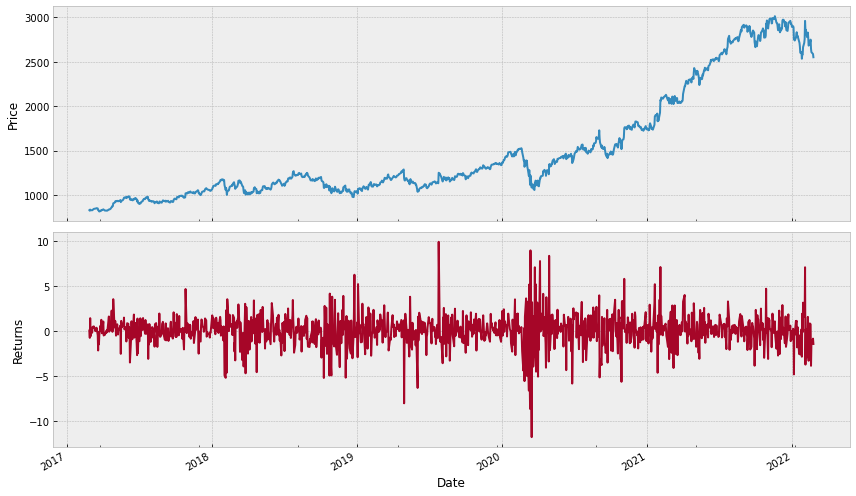

In [3]:
ax = data[['Close', 'returns']].plot(subplots=True, legend=False)
ax[0].set_ylabel('Price')
ax[1].set_ylabel('Returns')
plt.tight_layout()
plt.show()

## ARCH(1)

In [4]:
# ARCH(1)
model = arch_model(data['returns'], mean='Zero', vol='ARCH', p=1, o=0, q=0)
fitted_model = model.fit(disp=False)
print(fitted_model.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -2420.93
Distribution:                  Normal   AIC:                           4845.85
Method:            Maximum Likelihood   BIC:                           4856.13
                                        No. Observations:                 1258
Date:                Thu, Feb 24 2022   Df Residuals:                     1258
Time:                        09:50:55   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.1881      0.203     10.756  5.546e-27 [  1.789,  2.58

***** ARCH(1) *****


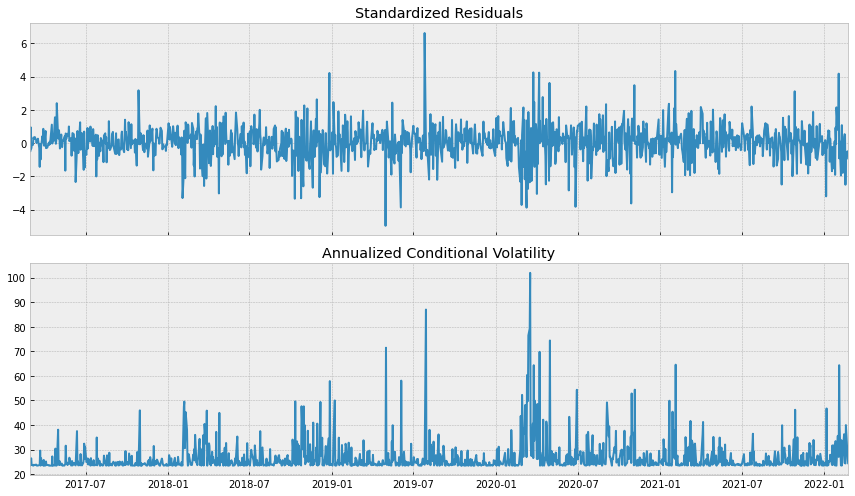

In [5]:
print('***** ARCH(1) *****')
fitted_model.plot(annualize='D')
plt.tight_layout()
plt.show()

## GARCH(1, 1)

In [6]:
# GARCH(1,1)
model = arch_model(data.returns, mean='Zero', vol='GARCH', p=1, o=0, q=1)
fitted_model = model.fit(disp=False)
print(fitted_model.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -2369.42
Distribution:                  Normal   AIC:                           4744.84
Method:            Maximum Likelihood   BIC:                           4760.26
                                        No. Observations:                 1258
Date:                Thu, Feb 24 2022   Df Residuals:                     1258
Time:                        09:50:56   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1243  8.981e-02      1.384      0.166 [-5.17

***** GARCH(1,1) *****


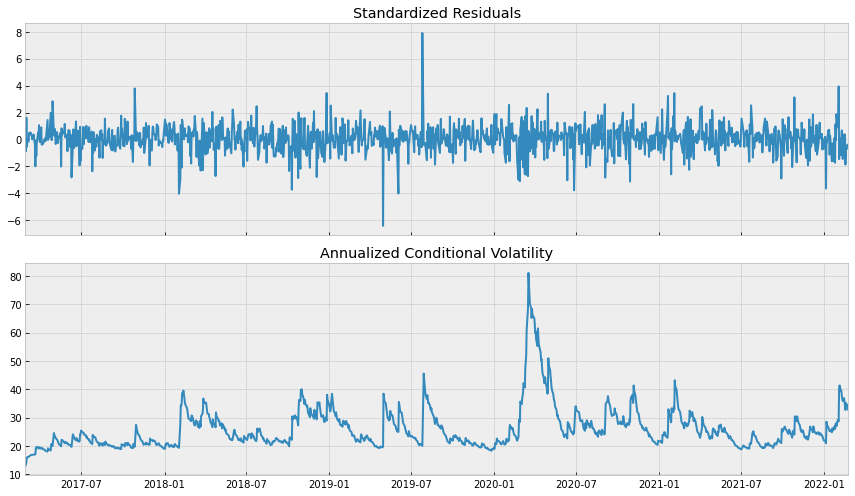

In [7]:
print('***** GARCH(1,1) *****')
fitted_model.plot(annualize='D')
plt.tight_layout()
plt.show()